Given data of money loaner which show their behaviour to fully pay the loans. The objective of the machine is to identify pattern of not fully paid.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Domain Understanding

In [2]:
#loading data
df = pd.read_csv('loans.csv')
df.shape

(9578, 14)

## 2. Data Exploration and Collection

In [3]:
#checking type of feature to identify unwanted values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   credit.policy          9578 non-null   int64  
 1   loan_purpose           9578 non-null   object 
 2   int.rate               9578 non-null   float64
 3   installment            9578 non-null   float64
 4   log.annual.inc         9574 non-null   float64
 5   debt_to_income         9578 non-null   float64
 6   fico                   9578 non-null   int64  
 7   days.with.cr.line      9549 non-null   float64
 8   revol.bal              9578 non-null   int64  
 9   revol.util             9516 non-null   float64
 10  recent_inq.last.6mths  9549 non-null   float64
 11  delinquent.2yrs        9549 non-null   float64
 12  bad_public_record      9549 non-null   float64
 13  not.fully.paid         9578 non-null   int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB

In [4]:
#check value of loan_purpose to check if there is unwanted character
df.loan_purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [5]:
#check all numerical values to identify all statistics parameters
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,debt_to_income,fico,days.with.cr.line,revol.bal,revol.util,recent_inq.last.6mths,delinquent.2yrs,bad_public_record,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9574.000000,9578.000000,9578.000000,9549.000000,9.578000e+03,9516.000000,9549.000000,9549.000000,9549.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.931874,12.606679,710.846314,4562.026085,1.691396e+04,46.865677,1.571578,0.163787,0.062101,0.160054
std,0.396245,0.026847,207.071301,0.614736,6.883970,37.970537,2497.985733,3.375619e+04,29.018642,2.198095,0.546712,0.262152,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.927987,12.665000,707.000000,4139.958333,8.596000e+03,46.400000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.289832,17.950000,737.000000,5730.000000,1.824950e+04,71.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## 3. Data Cleaning

In [6]:
#check skewness
df.skew()

credit.policy            -1.539621
int.rate                  0.164420
installment               0.912522
log.annual.inc            0.028703
debt_to_income            0.023941
fico                      0.471260
days.with.cr.line         1.157578
revol.bal                11.161058
revol.util                0.058099
recent_inq.last.6mths     3.604803
delinquent.2yrs           6.061788
bad_public_record         5.131172
not.fully.paid            1.854592
dtype: float64

In [7]:
df.isnull().sum()

credit.policy             0
loan_purpose              0
int.rate                  0
installment               0
log.annual.inc            4
debt_to_income            0
fico                      0
days.with.cr.line        29
revol.bal                 0
revol.util               62
recent_inq.last.6mths    29
delinquent.2yrs          29
bad_public_record        29
not.fully.paid            0
dtype: int64

In [8]:
#fill null values
#if skewness number(z): -0.1<z<0.1: normal distribution, use mean as the representation of data
#z<-0.1: right skewed, use median
#z>0.1: left skewed, use median
df['days.with.cr.line'].fillna(df['days.with.cr.line'].median(),inplace=True)
df['revol.util'].fillna(df['revol.util'].median(),inplace=True)
df['recent_inq.last.6mths'].fillna(df['recent_inq.last.6mths'].median(),inplace=True)
df['delinquent.2yrs'].fillna(df['delinquent.2yrs'].median(),inplace=True)
df['bad_public_record'].fillna(df['bad_public_record'].median(),inplace=True)
df['log.annual.inc'].fillna(df['log.annual.inc'].mean(),inplace=True)

In [9]:
df.duplicated().sum()

0

## 4. Feature Engineering

In [10]:
df.columns

Index(['credit.policy', 'loan_purpose', 'int.rate', 'installment',
       'log.annual.inc', 'debt_to_income', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'recent_inq.last.6mths', 'delinquent.2yrs',
       'bad_public_record', 'not.fully.paid'],
      dtype='object')

In [11]:
num=['int.rate','installment','log.annual.inc','debt_to_income','fico','days.with.cr.line',
    'revol.bal', 'revol.util', 'recent_inq.last.6mths']
cat=['credit.policy','loan_purpose','bad_public_record']

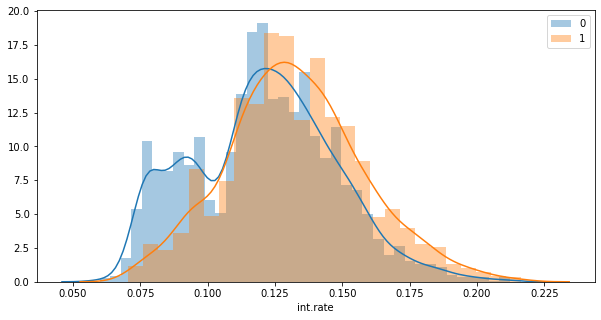

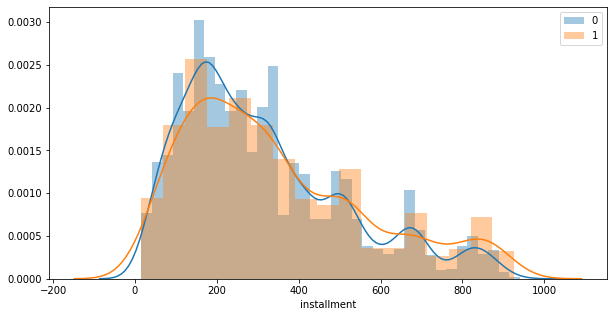

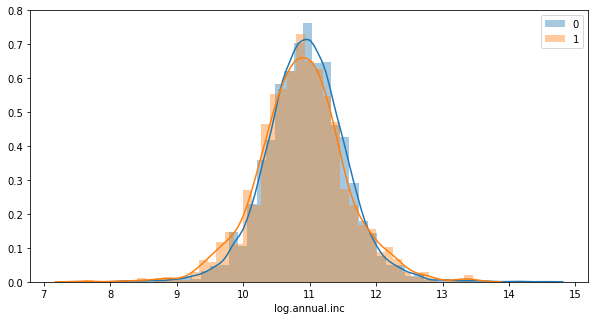

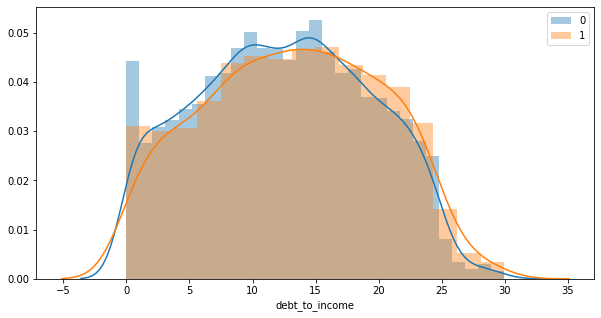

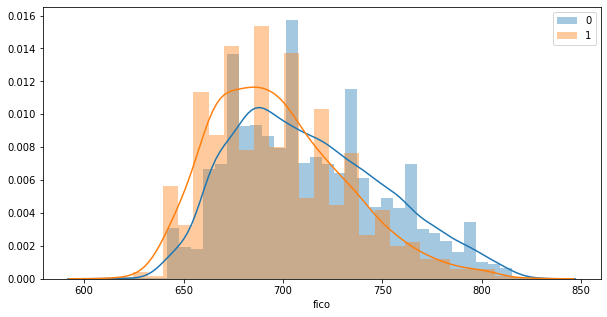

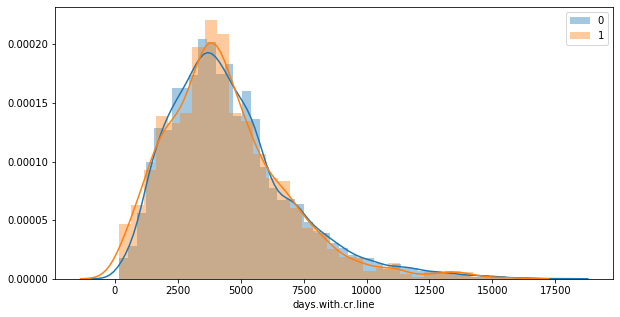

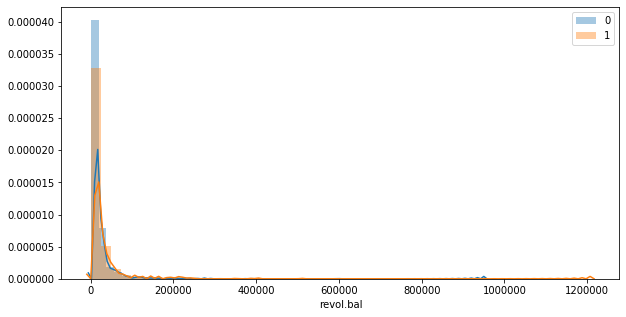

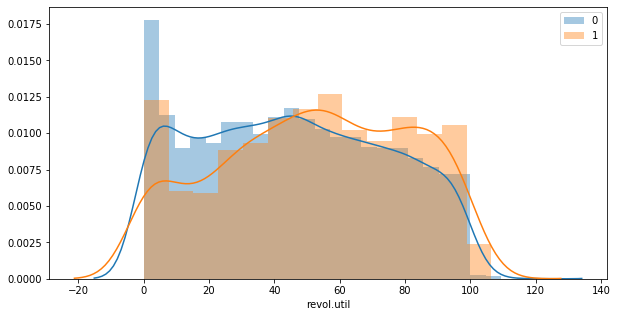

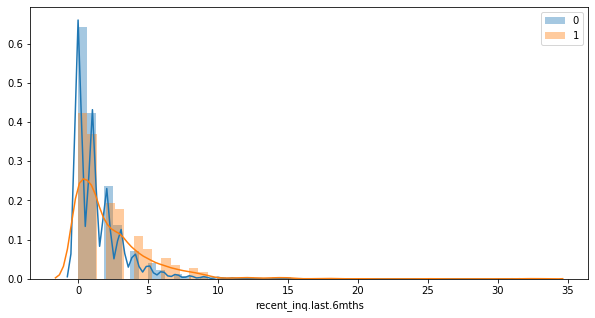

In [12]:
for col in num:
    plt.figure(figsize=(10,5))
    sns.distplot(df[col][df['not.fully.paid']==0])
    sns.distplot(df[col][df['not.fully.paid']==1])
    plt.legend(['0','1'])
    plt.show()

- Generally, int.rate has quitely similiar effects on not full paid(1) or full paid(0). Specifically with int.rate <0.1, customers have higher probability of paying full (0).
- 'installment','log.annual.inc','debt_to_income','fico','days.with.cr.line', revol.bal', 'revol.util', 'recent_inq.last.6mths' features have insignificant effect on not full paid.

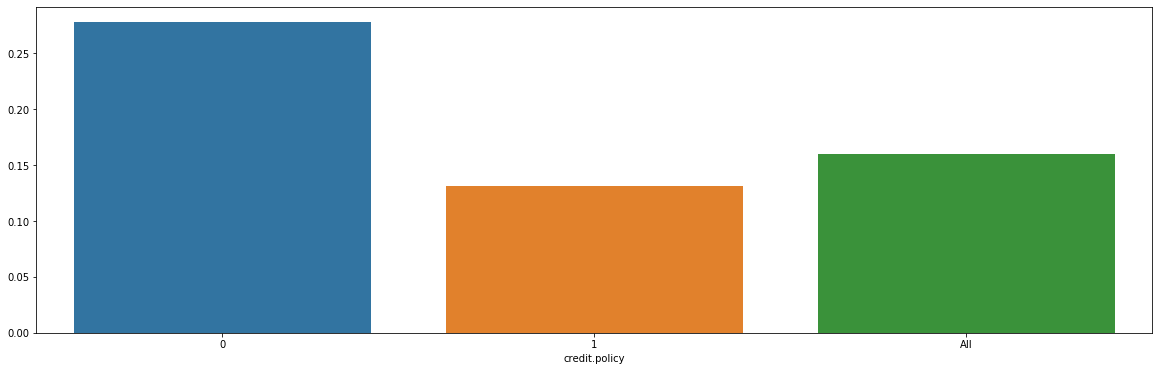

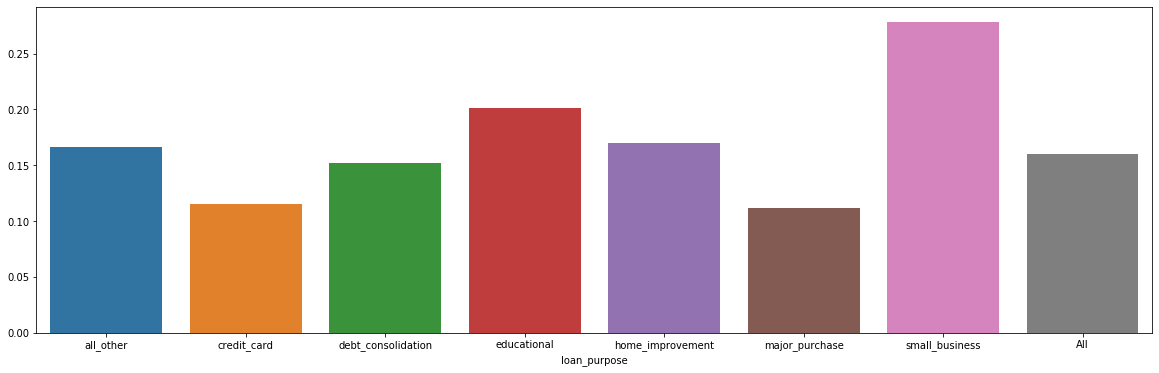

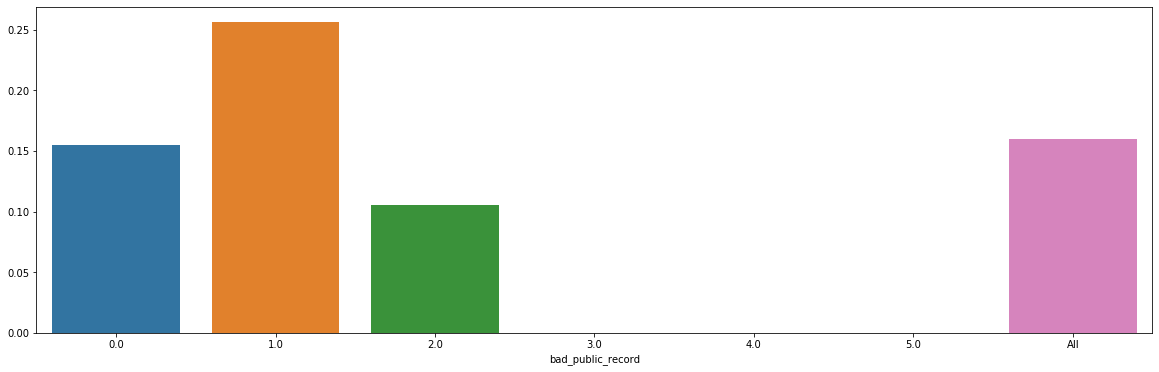

In [13]:
for col in cat:
    table = pd.crosstab(df[col],df['not.fully.paid'],margins=True)
    dropout_rate = table[1]/table['All']
    plt.figure(figsize=(20,6))
    sns.barplot(dropout_rate.index,dropout_rate.values)
    plt.show()

- Customers who doesn't meet underwriting credit criteria tend to not fully pay the loan
- Customers who loan for small business purpose tend to not fully pay
- Customers who have 1 bad public record tend to not fully pay

All categorical features have significant relation with not full pay

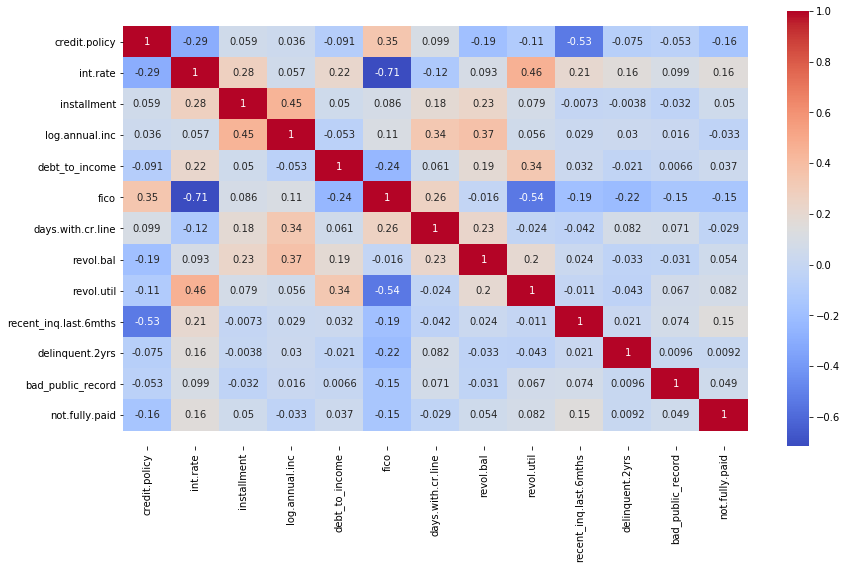

In [14]:
cor=df.corr()
plt.figure(figsize=(14,8))
ax=sns.heatmap(cor,annot=True,cmap='coolwarm')
bot,top = ax.get_ylim()
ax.set_ylim(bot+0.5, top-0.5)
plt.show()

Correlation represents the linear relationship features with target(not.fully paid)

- good correlation: credit policy, fico, and recent_inq.last6months

Generally, linear correlation between features and target is not good.

In [17]:
#Anova analysis
num2 = ['int.rate','installment','log.annual.inc','debt_to_income','fico','days.with.cr.line',
    'revol.bal', 'revol.util', 'recent_inq.last.6mths','delinquent.2yrs']
x = df[num2]
y = df['not.fully.paid']

from sklearn.feature_selection import f_regression
fvalue,pval = f_regression(x,y)
for i in range(len(x.columns)):
    print(x.columns[i],pval[i]) 

int.rate 1.2205604779595839e-55
installment 1.0012609650408298e-06
log.annual.inc 0.001124801825039363
debt_to_income 0.0002549163767584894
fico 4.22710009655971e-49
days.with.cr.line 0.004853446448470534
revol.bal 1.4522130187420675e-07
revol.util 1.1462878407592395e-15
recent_inq.last.6mths 3.001802741395709e-49
delinquent.2yrs 0.366974434940197


Assuming business confidence is 95%.

delinquent.2yrs feature is unimportant feature. The rest is important.

In [19]:
cat

['credit.policy', 'loan_purpose', 'bad_public_record']

In [20]:
#chi2 analysis
xcat = df[cat]
from sklearn.preprocessing import LabelEncoder
xcat['loan_purpose']= LabelEncoder().fit_transform(xcat['loan_purpose'])

from sklearn.feature_selection import chi2
cval,pval = chi2(xcat,y)
for i in range(len(cat)):
    print(cat[i],' ',pval[i])

C:\Users\Juanda\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


credit.policy   8.259775651518323e-12
loan_purpose   1.4102828766145098e-08
bad_public_record   4.4231854071676384e-07


All categorical features are important.

In [21]:
df.columns

Index(['credit.policy', 'loan_purpose', 'int.rate', 'installment',
       'log.annual.inc', 'debt_to_income', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'recent_inq.last.6mths', 'delinquent.2yrs',
       'bad_public_record', 'not.fully.paid'],
      dtype='object')

In [65]:
#dropping unimportant features
x= df.drop(['delinquent.2yrs', 'not.fully.paid'],axis=1)
y=df['not.fully.paid']

In [66]:
#encoding geography
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
encoder = ColumnTransformer([('ohe',OneHotEncoder(),[1])],remainder='passthrough')
encoder.fit(x)
x2 = encoder.transform(x)
x2 = pd.DataFrame(x2)
x2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,0.0


## 5. Preprocessing of Data

In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.2, random_state=5)

## 6. Apply Machine Learning Algorithm

In [68]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini",max_depth=8,max_leaf_nodes=30)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 7. Performance Analysis

In [69]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score
print(metrics.accuracy_score(ytrain,model.predict(xtrain)))
print(metrics.accuracy_score(ytest,model.predict(xtest)))

0.8482119551031062
0.831419624217119


In [70]:
#recall score
print(metrics.recall_score(ytrain,model.predict(xtrain)))
print(metrics.recall_score(ytest,model.predict(xtest)))

0.1033091202582728
0.04421768707482993


- low recall score
- seem to be overfitting

## 8. Tuning and Optimization
### Hyperparameter tuning using gridsearch

In [71]:
grid = {'max_depth':np.arange(5,31,2),
       'min_samples_leaf':np.arange(10,51,5),
       'min_samples_split':np.arange(10,51,10)}

In [72]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid=grid,verbose =True,scoring='recall',cv=5,n_jobs=-1)
grid_search.fit(x2,y)

Fitting 5 folds for each of 585 candidates, totalling 2925 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 2925 out of 2925 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21,

In [73]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 27, 'min_samples_leaf': 10, 'min_samples_split': 10}
0.26458878882714865


In [74]:
#build new model
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='gini',max_depth=27,min_samples_leaf=10,min_samples_split=10,random_state=5)
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=27, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [79]:
print(metrics.accuracy_score(ytrain,model2.predict(xtrain)))
print(metrics.accuracy_score(ytest,model2.predict(xtest)))

0.8666144609762464
0.7980167014613778


In [75]:
#recall score
print(metrics.recall_score(ytrain,model2.predict(xtrain)))
print(metrics.recall_score(ytest,model2.predict(xtest)))
print(metrics.f1_score(ytest,model2.predict(xtest)))

0.37368845843422116
0.14965986394557823
0.18526315789473682


### Visualizing Decision Tree

In [76]:
df.columns

Index(['credit.policy', 'loan_purpose', 'int.rate', 'installment',
       'log.annual.inc', 'debt_to_income', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'recent_inq.last.6mths', 'delinquent.2yrs',
       'bad_public_record', 'not.fully.paid'],
      dtype='object')

In [77]:
df['loan_purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

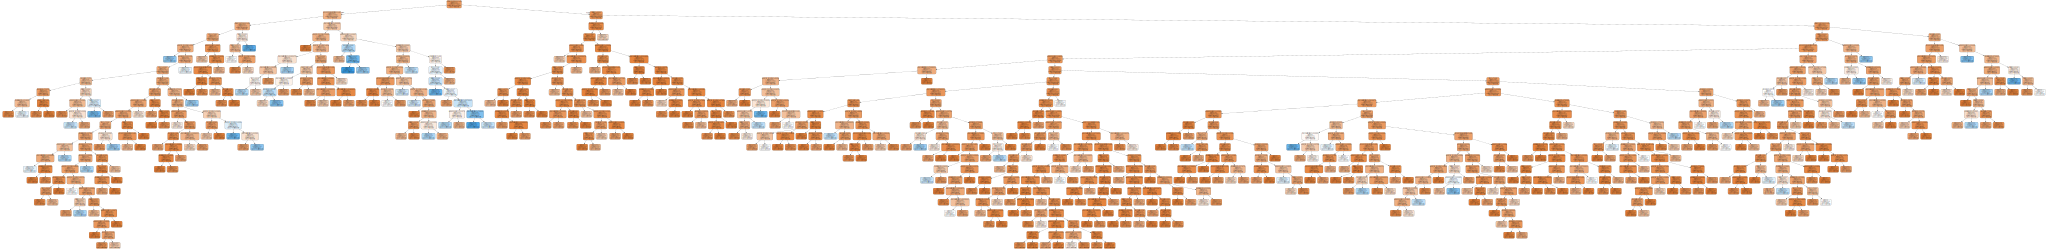

In [81]:
import graphviz
from sklearn import tree
features_names = ['credit.policy','all_other','credit_card','debt_consolidation','educational','home_improvement',
                  'major_purchase','small_business','int.rate', 'installment','log.annual.inc', 'debt_to_income',
                  'fico', 'days.with.cr.line','revol.bal', 'revol.util', 'recent_inq.last.6mths','bad_public_record']
class_names = ['fully.paid','not.fully.paid']
graph_data = tree.export_graphviz(model2,feature_names=features_names,class_names=class_names,
                                 rounded=True, filled=True)
graph = graphviz.Source(graph_data)
graph

In [82]:
#feature importance - can be useful for feature selection
#higher values means more important feature
model2.feature_importances_

array([0.01595435, 0.        , 0.00700529, 0.00220154, 0.        ,
       0.        , 0.01806166, 0.07373084, 0.11823722, 0.08054264,
       0.12932795, 0.12251162, 0.07674007, 0.10416115, 0.10784326,
       0.09996489, 0.03985124, 0.00386628])

In [84]:
for i in range(len(features_names)): print(features_names[i],model2.feature_importances_[i])

credit.policy 0.015954353052506545
all_other 0.0
credit_card 0.007005286091174397
debt_consolidation 0.002201539017927359
educational 0.0
home_improvement 0.0
major_purchase 0.018061660255719165
small_business 0.0737308427531706
int.rate 0.11823721862118326
installment 0.08054263515678227
log.annual.inc 0.12932795473124528
debt_to_income 0.12251162103182217
fico 0.07674007239007614
days.with.cr.line 0.10416115021003468
revol.bal 0.10784325704845761
revol.util 0.09996489414885207
recent_inq.last.6mths 0.03985123930437168
bad_public_record 0.00386627618667673
